<a href="https://colab.research.google.com/github/brayyao/AOL-Software-Engineering-Group3/blob/main/Structural_Protein_Sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install watermark
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 25.5 MB/s eta 0:00:00


In [ ]:
# Import of libraries

# System libraries
import random
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Rdkit para carregar a estrutura química e desenhá-la
from rdkit import Chem
from rdkit.Chem import Draw

# Model traing
from keras.preprocessing.sequence import pad_sequences

# Importar display para mostrar imagens no Jupyterfrom keras.preprocessing.sequence import pad_sequences
from IPython.display import display

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.11.12
Author: Library versions

keras     : 3.8.0
plotly    : 5.24.1
matplotlib: 3.10.0
platform  : 1.0.8
pandas    : 2.2.2
watermark : 2.5.0
numpy     : 2.0.2
re        : 2.2.1
IPython   : 7.34.0
sklearn   : 1.6.1
rdkit     : 2025.3.2
seaborn   : 0.13.2



In [ ]:
# Database
df = pd.read_csv("pdb_data_no_dups.csv")
df2 = pd.read_csv("pdb_data_seq.csv")

In [ ]:
df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [ ]:
df.tail()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.6,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.8,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.9,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0
141400,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.4,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0


In [ ]:
df.shape

(141401, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [ ]:
df.dtypes

,0
structureId,object
classification,object
experimentalTechnique,object
macromoleculeType,object
residueCount,int64
resolution,float64
structureMolecularWeight,float64
crystallizationMethod,object
crystallizationTempK,float64
densityMatthews,float64


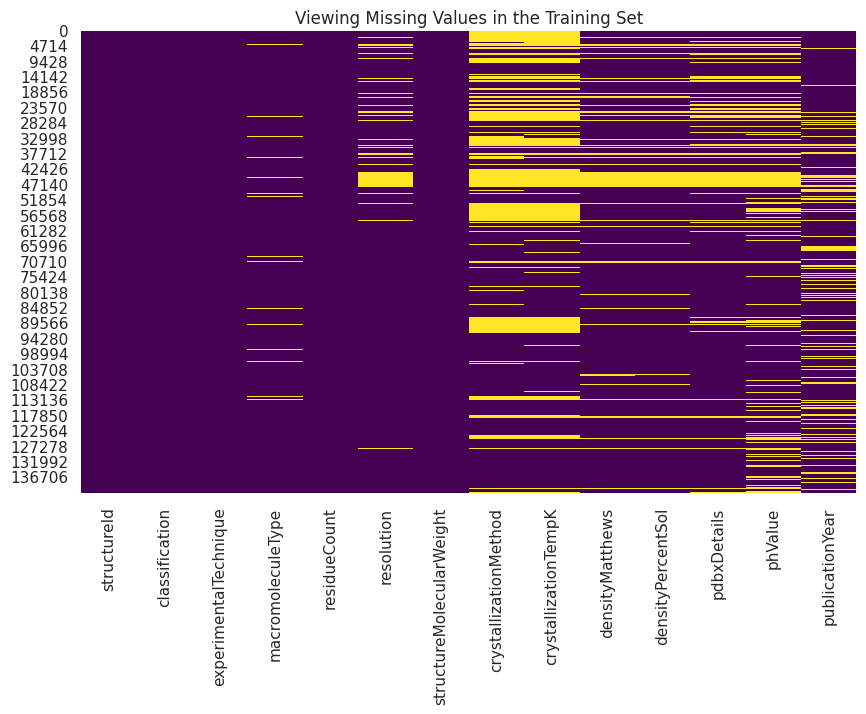

In [ ]:
# View missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

In [ ]:
# 1. Handling Missing Values

print("Number of missing values ​​per column:")
print(df.isnull().sum())

Number of missing values ​​per column:
structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64


In [ ]:
# If there are missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables

#median_values = train_df.median()
#train_df.fillna(median_values, inplace=True)

In [ ]:
# Remove null data from specific columns
df = df.dropna(subset=['classification', 'macromoleculeType', 'resolution',
                       'crystallizationMethod', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
                       'pdbxDetails', 'phValue', 'publicationYear'])

print(df.isnull().sum())

structureId                 0
classification              0
experimentalTechnique       0
macromoleculeType           0
residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
publicationYear             0
dtype: int64


In [ ]:
# Viewing dataset removing NaN data
print(df.isnull().sum())

structureId                 0
classification              0
experimentalTechnique       0
macromoleculeType           0
residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
publicationYear             0
dtype: int64


In [ ]:
df.shape

(65886, 14)

In [ ]:
# Merge dataset
# Merge
data_merge = df.merge(df2,how='inner',on='structureId')
data_merge.rename({'macromoleculeType_x':'macromoleculeType','residueCount_y':'residueCount'},axis=1,inplace=True)
data_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)
data_merge

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,102D,DNA,X-RAY DIFFRACTION,DNA,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,A,CGCAAATTTGCG,24.0
1,102D,DNA,X-RAY DIFFRACTION,DNA,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,B,CGCAAATTTGCG,24.0
2,110D,DNA,X-RAY DIFFRACTION,DNA,1.90,2337.73,"VAPOR DIFFUSION, SITTING DROP",277.0,2.90,57.63,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1993.0,A,CGGCCG,6.0
3,111D,DNA,X-RAY DIFFRACTION,DNA,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.0,2.29,46.25,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1989.0,A,CGCAAATTGGCG,24.0
4,111D,DNA,X-RAY DIFFRACTION,DNA,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.0,2.29,46.25,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1989.0,B,CGCAAATTGGCG,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77065,3IXT,IMMUNE SYSTEM,X-RAY DIFFRACTION,Protein,2.75,100574.88,"VAPOR DIFFUSION, HANGING DROP",293.0,2.38,48.31,"17.5% PEG 8000, 0.2 M zinc acetate, 0.1 M caco...",6.5,2010.0,B,DIQMTQSPSTLSASVGDRVTITCSASSRVGYMHWYQQKPGKAPKLL...,928.0
77066,3IXT,IMMUNE SYSTEM,X-RAY DIFFRACTION,Protein,2.75,100574.88,"VAPOR DIFFUSION, HANGING DROP",293.0,2.38,48.31,"17.5% PEG 8000, 0.2 M zinc acetate, 0.1 M caco...",6.5,2010.0,C,XNSELLSLINDMPITNDQKKLMSNNX,928.0
77067,3IXT,IMMUNE SYSTEM,X-RAY DIFFRACTION,Protein,2.75,100574.88,"VAPOR DIFFUSION, HANGING DROP",293.0,2.38,48.31,"17.5% PEG 8000, 0.2 M zinc acetate, 0.1 M caco...",6.5,2010.0,H,QVTLRESGPALVKPTQTLTLTCTFSGFSLSTAGMSVGWIRQPPGKA...,928.0
77068,3IXT,IMMUNE SYSTEM,X-RAY DIFFRACTION,Protein,2.75,100574.88,"VAPOR DIFFUSION, HANGING DROP",293.0,2.38,48.31,"17.5% PEG 8000, 0.2 M zinc acetate, 0.1 M caco...",6.5,2010.0,L,DIQMTQSPSTLSASVGDRVTITCSASSRVGYMHWYQQKPGKAPKLL...,928.0


In [ ]:
data_merge.classification.value_counts().head(20)

,count
classification,
HYDROLASE,10770
TRANSFERASE,8656
OXIDOREDUCTASE,7766
LYASE,3424
IMMUNE SYSTEM,3283
RIBOSOME,2457
TRANSCRIPTION,1692
ISOMERASE,1469
LIGASE,1388


In [ ]:
# DNA
# DNA BINDING PROTEIN

In [ ]:
def preprocess_protein_data(data, class_mapping, columns):
    """
    Transforms the 'classification' column into 'Target' using class_mapping
    and reduces the dataset to the specified columns, removing null values.

    Parameters:
    - data: Original DataFrame.
    - class_mapping: Dictionary to map 'classification' values to 'Target'.
    - columns: List of columns to retain in the reduced dataset.

    Returns:
    - Preprocessed DataFrame with null values removed.
    """
    # Transform 'classification' into 'Target'
    data['Target'] = data['classification'].map(class_mapping)

    # Reduce the dataset to specified columns and remove null values
    data_reduced = data[columns].dropna()
    return data_reduced

    # Example of using the function
class_dict = {'HYDROLASE': 1, 'TRANSFERASE': 2, 'OXIDOREDUCTASE': 3}
columns_to_keep = ["experimentalTechnique", "macromoleculeType", "resolution", "structureMolecularWeight",
                   "crystallizationMethod", "crystallizationTempK", "densityMatthews", "densityPercentSol",
                   "pdbxDetails", "phValue", "publicationYear", "chainId", "sequence", "residueCount", "Target"]

# Apply the function
data_protein_base = preprocess_protein_data(data_merge, class_dict, columns_to_keep)

# Mapping Target values to 0, 1, 2
target_mapping = {1.0: 0,
                  2.0: 1,
                  3.0: 2}

# Apply the mapping to the Target column
data_protein_base['Target'] = data_protein_base['Target'].map(target_mapping)

# Check the result
data_protein_base.head()

,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount,Target
61,X-RAY DIFFRACTION,Protein,2.6,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,CRYSTALS GROWN FROM 4 MICROLITER HANGING DROPS...,8.40,1998.0,A,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,374.0,2
90,X-RAY DIFFRACTION,Protein,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0,2
91,X-RAY DIFFRACTION,Protein,1.9,45428.53,microseeding,277.0,2.05,32.00,PROTEIN WAS CRYSTALLIZED AT 50MG/ML FROM 2.15 ...,6.10,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0,2
92,X-RAY DIFFRACTION,Protein,1.6,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,A,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0,2
93,X-RAY DIFFRACTION,Protein,1.6,45430.34,microseeding,277.0,2.04,32.20,PROTEIN WAS CRYSTALLIZED FROM 2.15 M (NH4)2SO4...,6.15,1996.0,B,AVYTLPELPYDYSALEPYISGEIMELHHDKHHKAYVDGANTALDKL...,402.0,2


In [ ]:
# Check the result
print(data_protein_base['Target'].value_counts())

Target
0    10770
1     8656
2     7766
Name: count, dtype: int64


In [ ]:
# Preprocessing
data_protein_base['macromoleculeType'] = data_protein_base['macromoleculeType'].astype('category')
data_protein_base.dtypes